In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [42]:
df = pd.read_csv('data/stud.csv')

In [43]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [44]:
df.shape

(1000, 8)

In [45]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [46]:
df.duplicated().sum()

np.int64(0)

In [47]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [48]:
print("Number of unique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Number of unique values in each column:
gender: 2
race_ethnicity: 5
parental_level_of_education: 6
lunch: 2
test_preparation_course: 2
math_score: 81
reading_score: 72
writing_score: 77


In [49]:
print("unique values in 'gender':", df['gender'].unique())
print("unique values in 'race_ethnicity':", df['race_ethnicity'].unique())
print("unique values in 'parental_level_of_education':", df['parental_level_of_education'].unique())
print("unique values in 'lunch':", df['lunch'].unique())
print("unique values in 'test_preparation_course':", df['test_preparation_course'].unique())
# print("unique values in 'math_score':", df['math_score'].unique())
# print("unique values in 'reading_score':", df['reading_score'].unique())
# print("unique values in 'writing_score':", df['writing_score'].unique())

unique values in 'gender': ['female' 'male']
unique values in 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
unique values in 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in 'lunch': ['standard' 'free/reduced']
unique values in 'test_preparation_course': ['none' 'completed']


In [50]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_columns)
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print("Categorical columns:", categorical_columns)

Numeric columns: ['math_score', 'reading_score', 'writing_score']
Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [51]:
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['total_score'] = df['total_score'].astype(int)
df['average_score'] = df['average_score'].round(2)

In [52]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [53]:
num_full_marks_reading = (df['reading_score'] == 100).sum()
print("Number of students who got full marks in reading:", num_full_marks_reading)
num_full_marks_writing = (df['writing_score'] == 100).sum()
print("Number of students who got full marks in writing:", num_full_marks_writing)
num_full_marks_math = (df['math_score'] == 100).sum()
print("Number of students who got full marks in math:", num_full_marks_math)

Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14
Number of students who got full marks in math: 7


In [54]:
num_less_marks_reading = (df['reading_score'] <= 20).sum()
print("Number of students who got full marks in reading:", num_less_marks_reading)
num_less_marks_writing = (df['writing_score'] <= 20).sum()
print("Number of students who got full marks in writing:", num_less_marks_writing)
num_less_marks_math = (df['math_score'] <= 20).sum()
print("Number of students who got full marks in math:", num_less_marks_math)

Number of students who got full marks in reading: 1
Number of students who got full marks in writing: 3
Number of students who got full marks in math: 4


<Axes: xlabel='writing_score', ylabel='Count'>

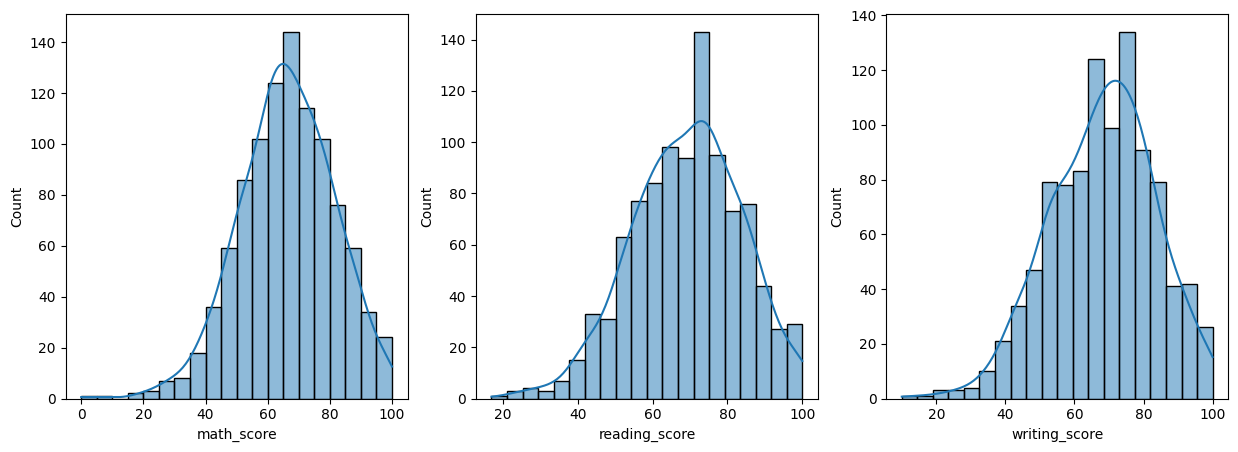

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['math_score'], bins=20, kde=True, ax=axes[0])
sns.histplot(df['reading_score'], bins=20, kde=True, ax=axes[1])
sns.histplot(df['writing_score'], bins=20, kde=True, ax=axes[2])        

<Axes: xlabel='average_score', ylabel='Count'>

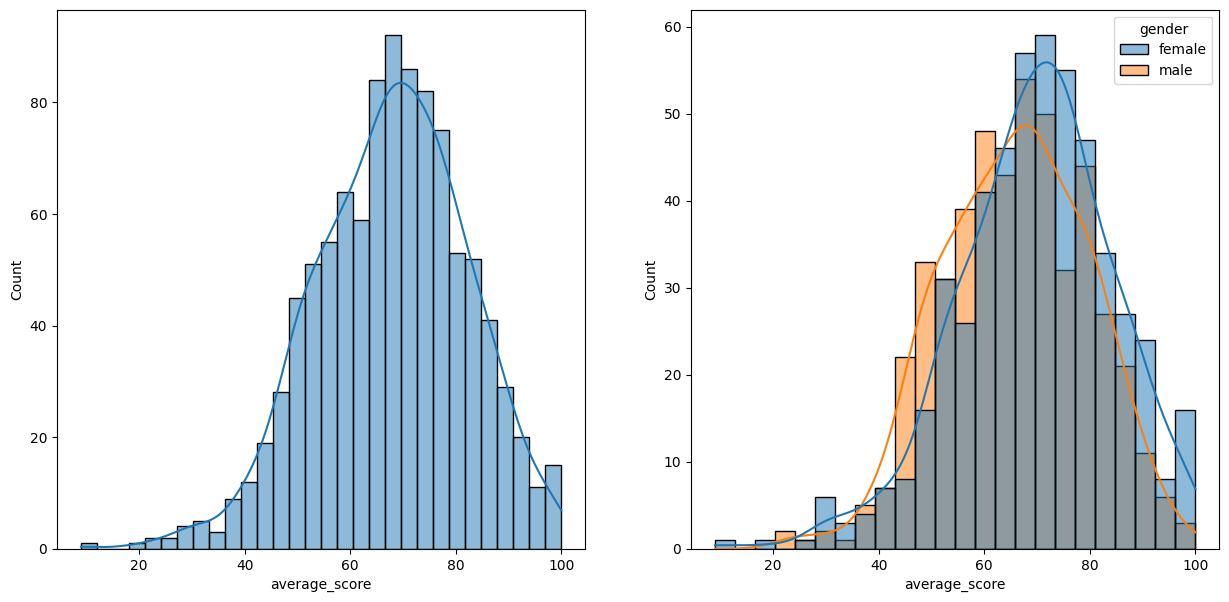

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(df,x='average_score', bins=30, kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df,x='average_score', hue='gender', kde=True)

<Axes: xlabel='total_score', ylabel='Count'>

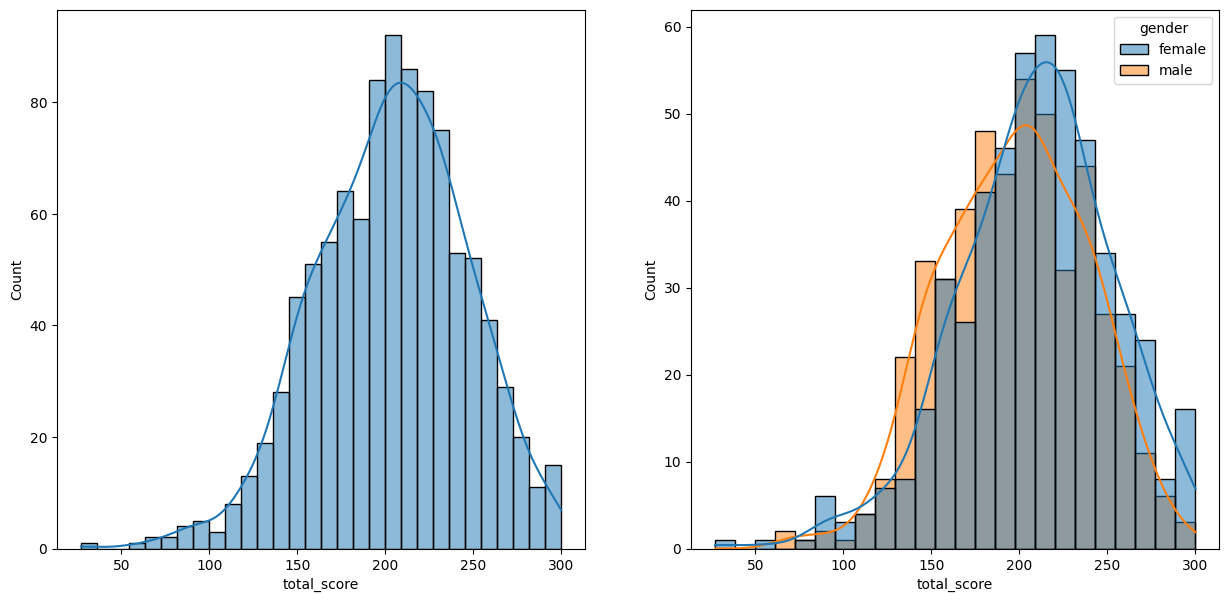

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(df,x='total_score', bins=30, kde=True)
plt.subplot(1, 2, 2)
sns.histplot(df,x='total_score', hue='gender', kde=True)

<Axes: xlabel='average_score', ylabel='Count'>

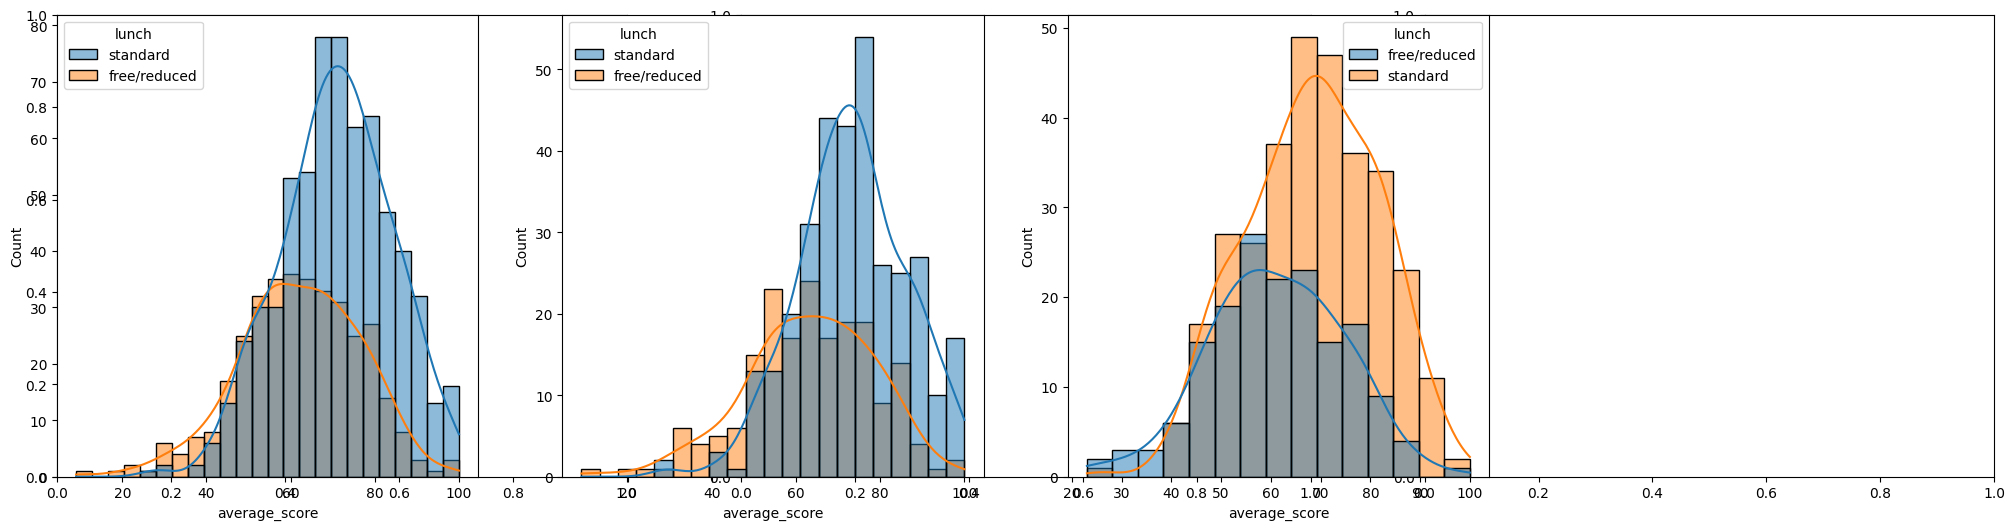

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(1, 4, 1)
sns.histplot(df,x='average_score', hue='lunch', kde=True)
plt.subplot(1, 4, 2)
sns.histplot(df[df['gender']=='female'] ,x='average_score', hue='lunch', kde=True)
plt.subplot(1, 4, 3)
sns.histplot(df[df['gender']=='male'] ,x='average_score', hue='lunch', kde=True)

ValueError: Could not interpret value `parental level of education` for `hue`. An entry with this name does not appear in `data`.

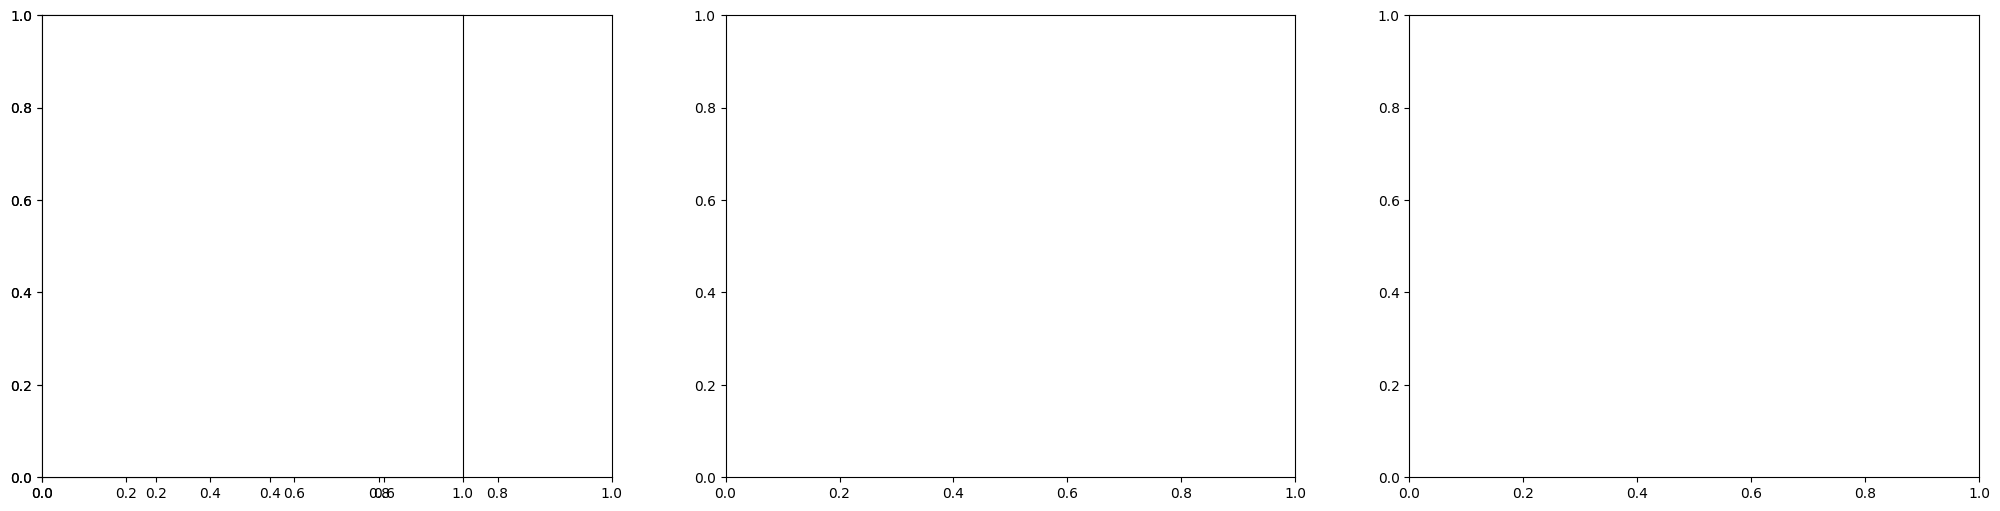

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()

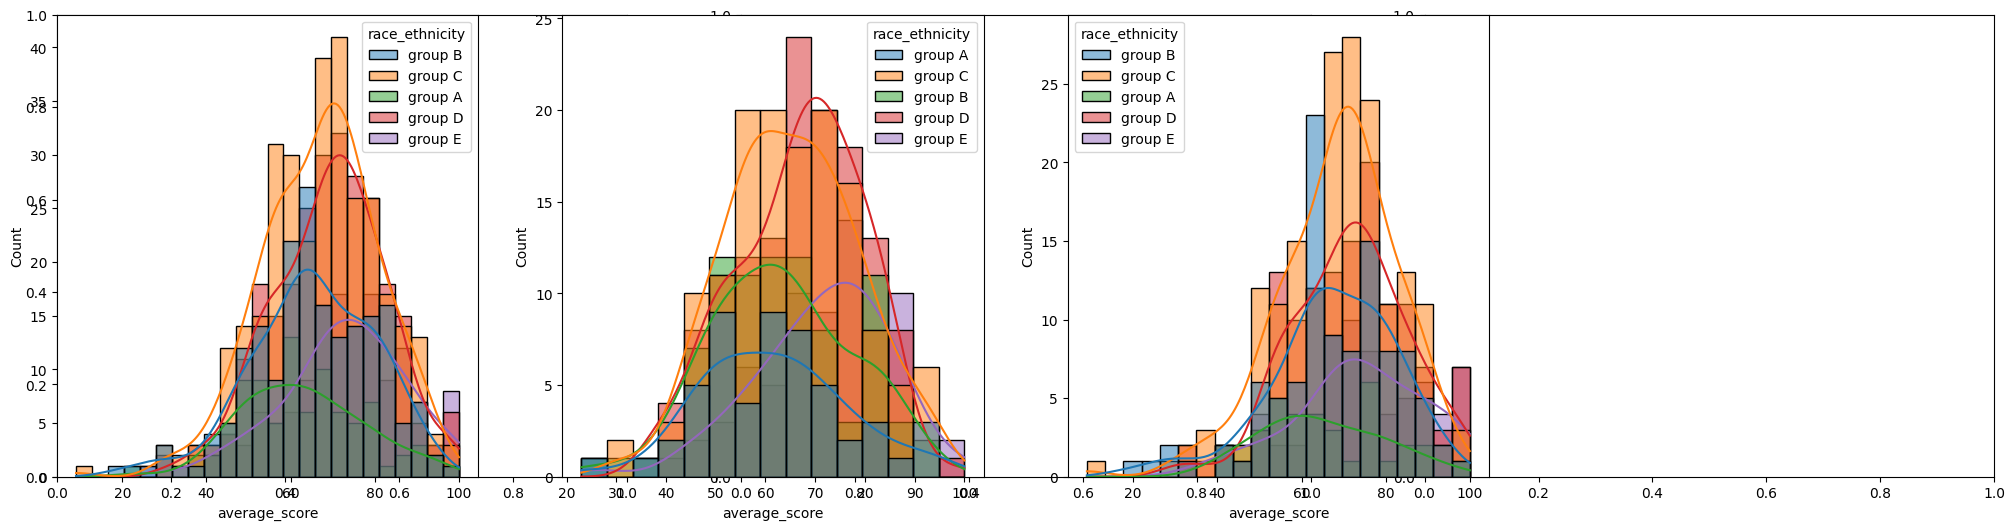

In [61]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

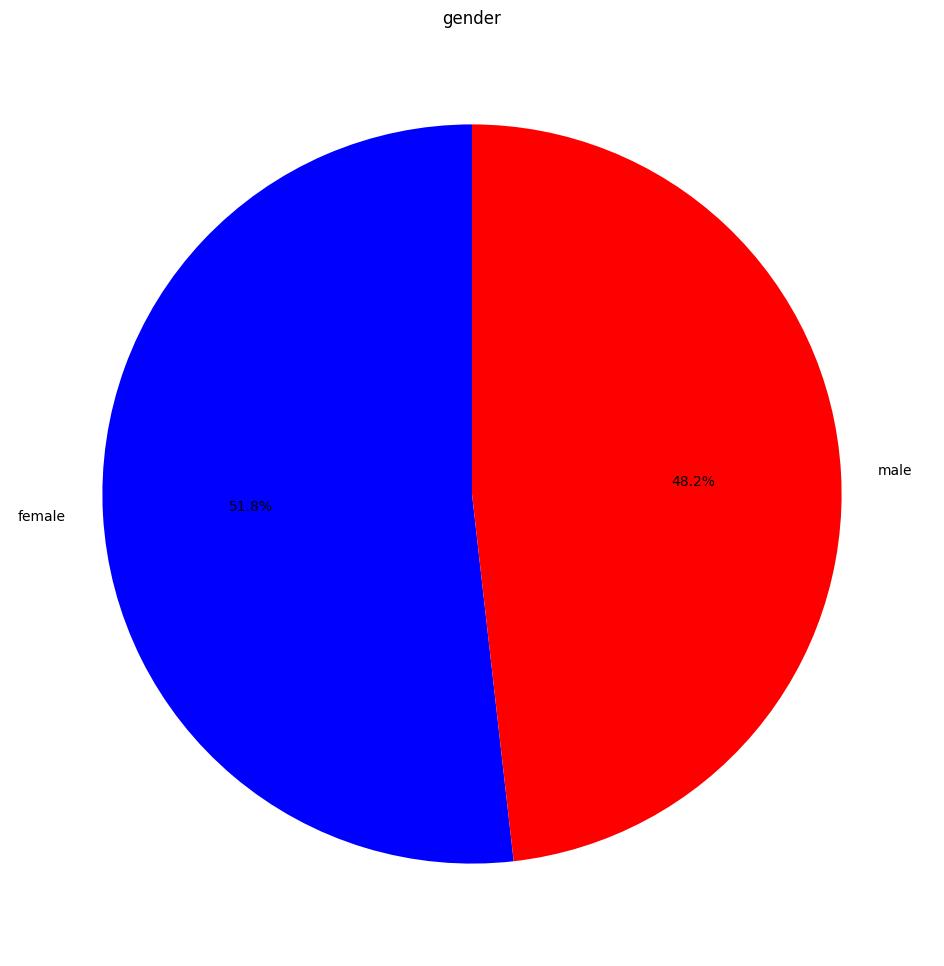

In [ ]:
plt.rcParams['figure.figsize'] = [30, 12]

# plt.subplot(151)
size=df['gender'].value_counts()
labels='female','male'
color=['blue','red']
plt.pie(size, labels=labels, autopct='%1.1f%%',colors=color, startangle=90)
plt.title('gender')
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

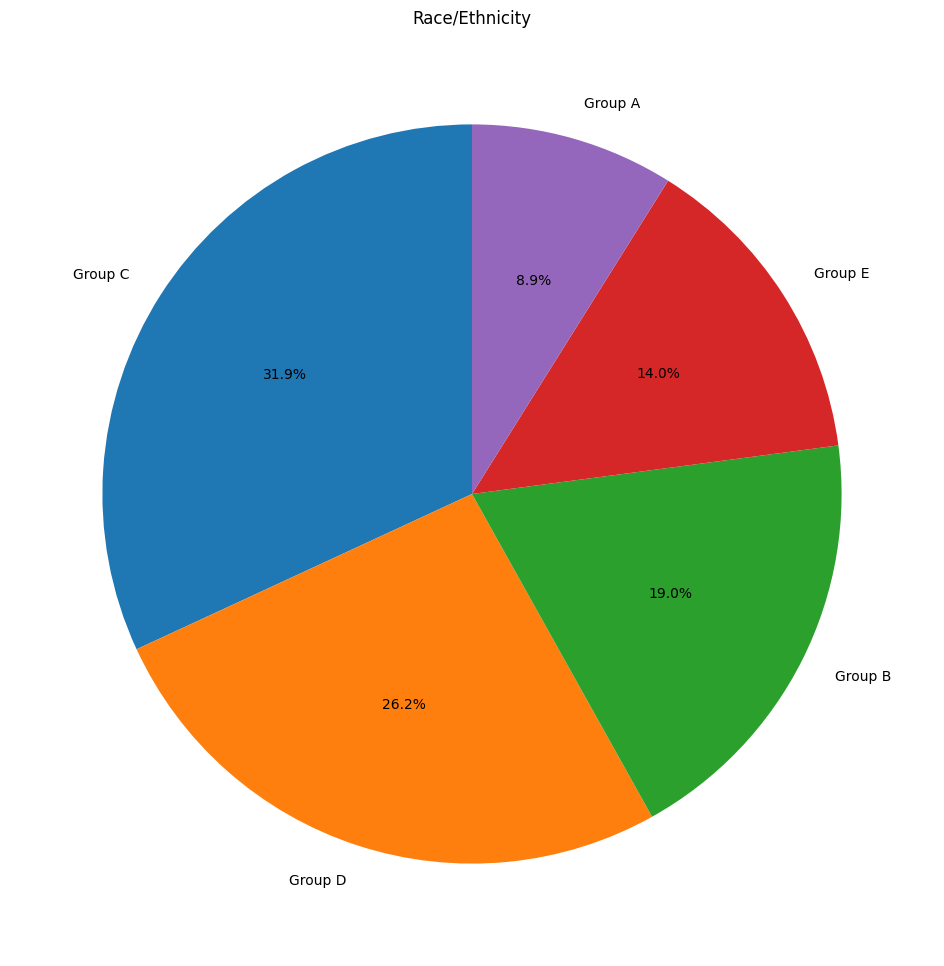

In [70]:
size=df['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
# color=['blue','red']
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Race/Ethnicity')
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

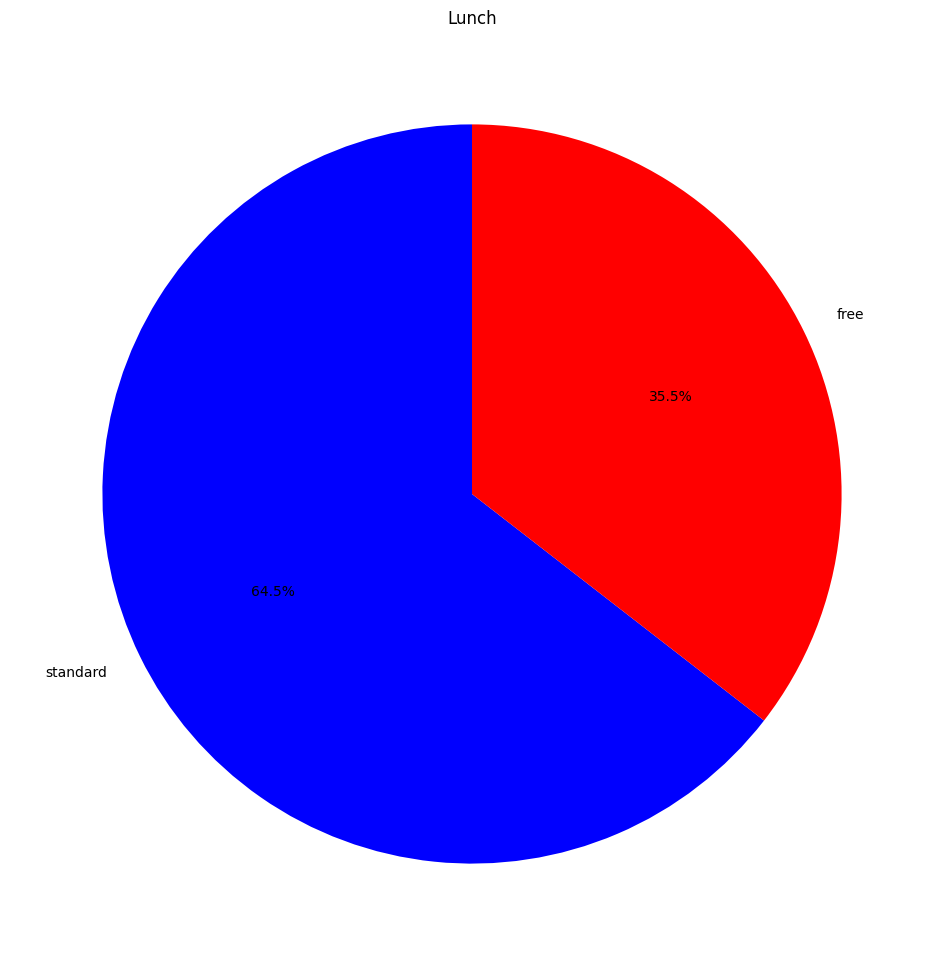

In [73]:
size=df['lunch'].value_counts()
labels='standard', 'free'
color=['blue','red']
plt.pie(size, labels=labels,colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Lunch')
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

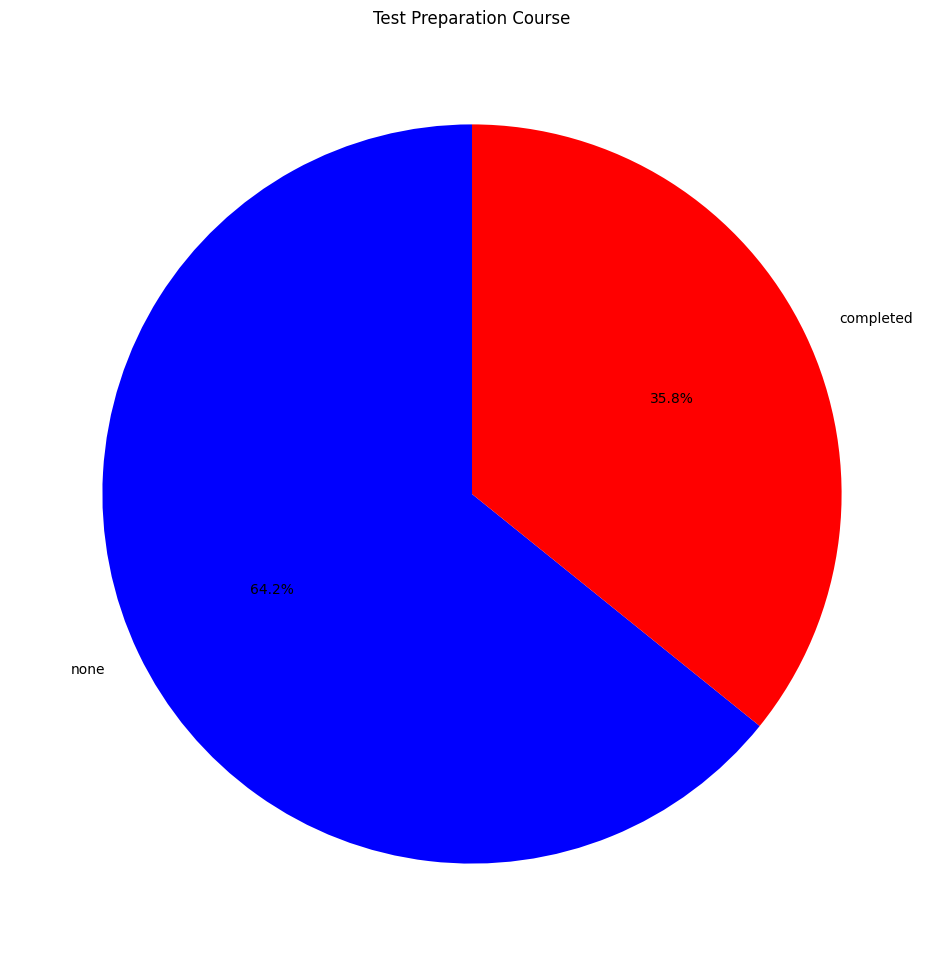

In [75]:
size=df['test_preparation_course'].value_counts()
labels='none', 'completed'
color=['blue','red']
plt.pie(size, labels=labels, colors=color,autopct='%1.1f%%', startangle=90)
plt.title('Test Preparation Course')
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

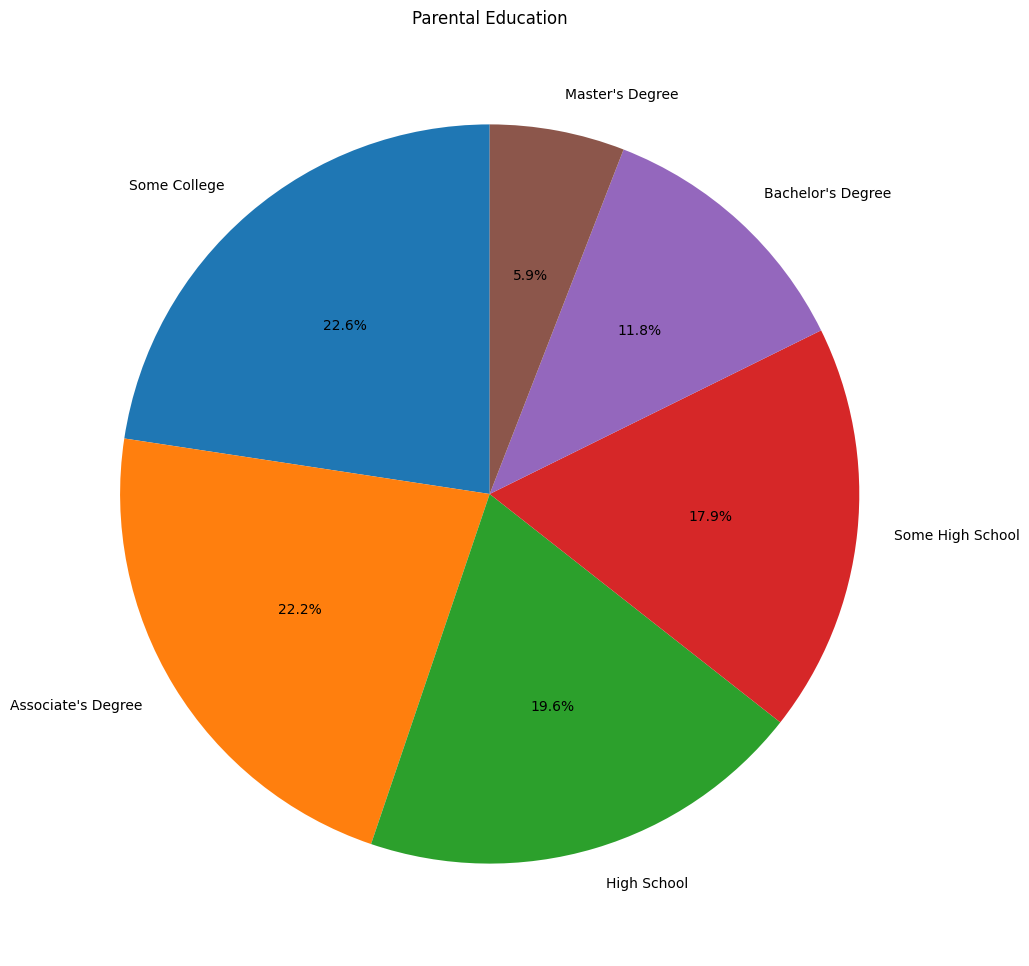

In [78]:
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
# color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,labels = labels,autopct='%1.1f%%', startangle=90)
plt.title('Parental Education')
plt.axis('off')

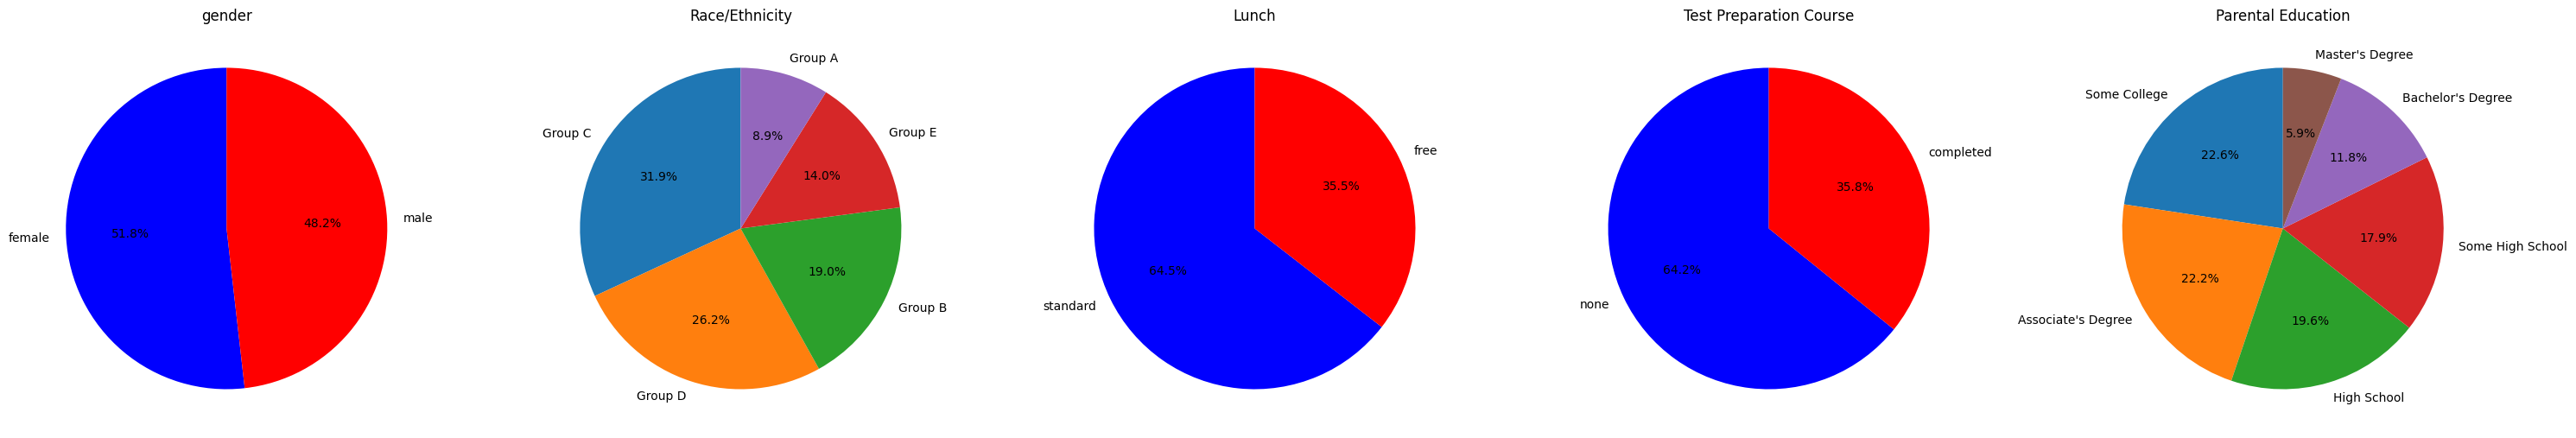

In [81]:
# All together in a Dashboard

plt.rcParams['figure.figsize'] = [30, 12]

plt.subplot(151)
size=df['gender'].value_counts()
labels='female','male'
color=['blue','red']
plt.pie(size, labels=labels, autopct='%1.1f%%',colors=color, startangle=90)
plt.title('gender')
plt.axis('off')

plt.subplot(152)
size=df['race_ethnicity'].value_counts()
labels='Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Race/Ethnicity')
plt.axis('off')

plt.subplot(153)
size=df['lunch'].value_counts()
labels='standard', 'free'
color=['blue','red']
plt.pie(size, labels=labels,colors=color, autopct='%1.1f%%', startangle=90)
plt.title('Lunch')
plt.axis('off')

plt.subplot(154)
size=df['test_preparation_course'].value_counts()
labels='none', 'completed'
color=['blue','red']
plt.pie(size, labels=labels, colors=color,autopct='%1.1f%%', startangle=90)
plt.title('Test Preparation Course')
plt.axis('off')

plt.subplot(155)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size,labels = labels,autopct='%1.1f%%', startangle=90)
plt.title('Parental Education')
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

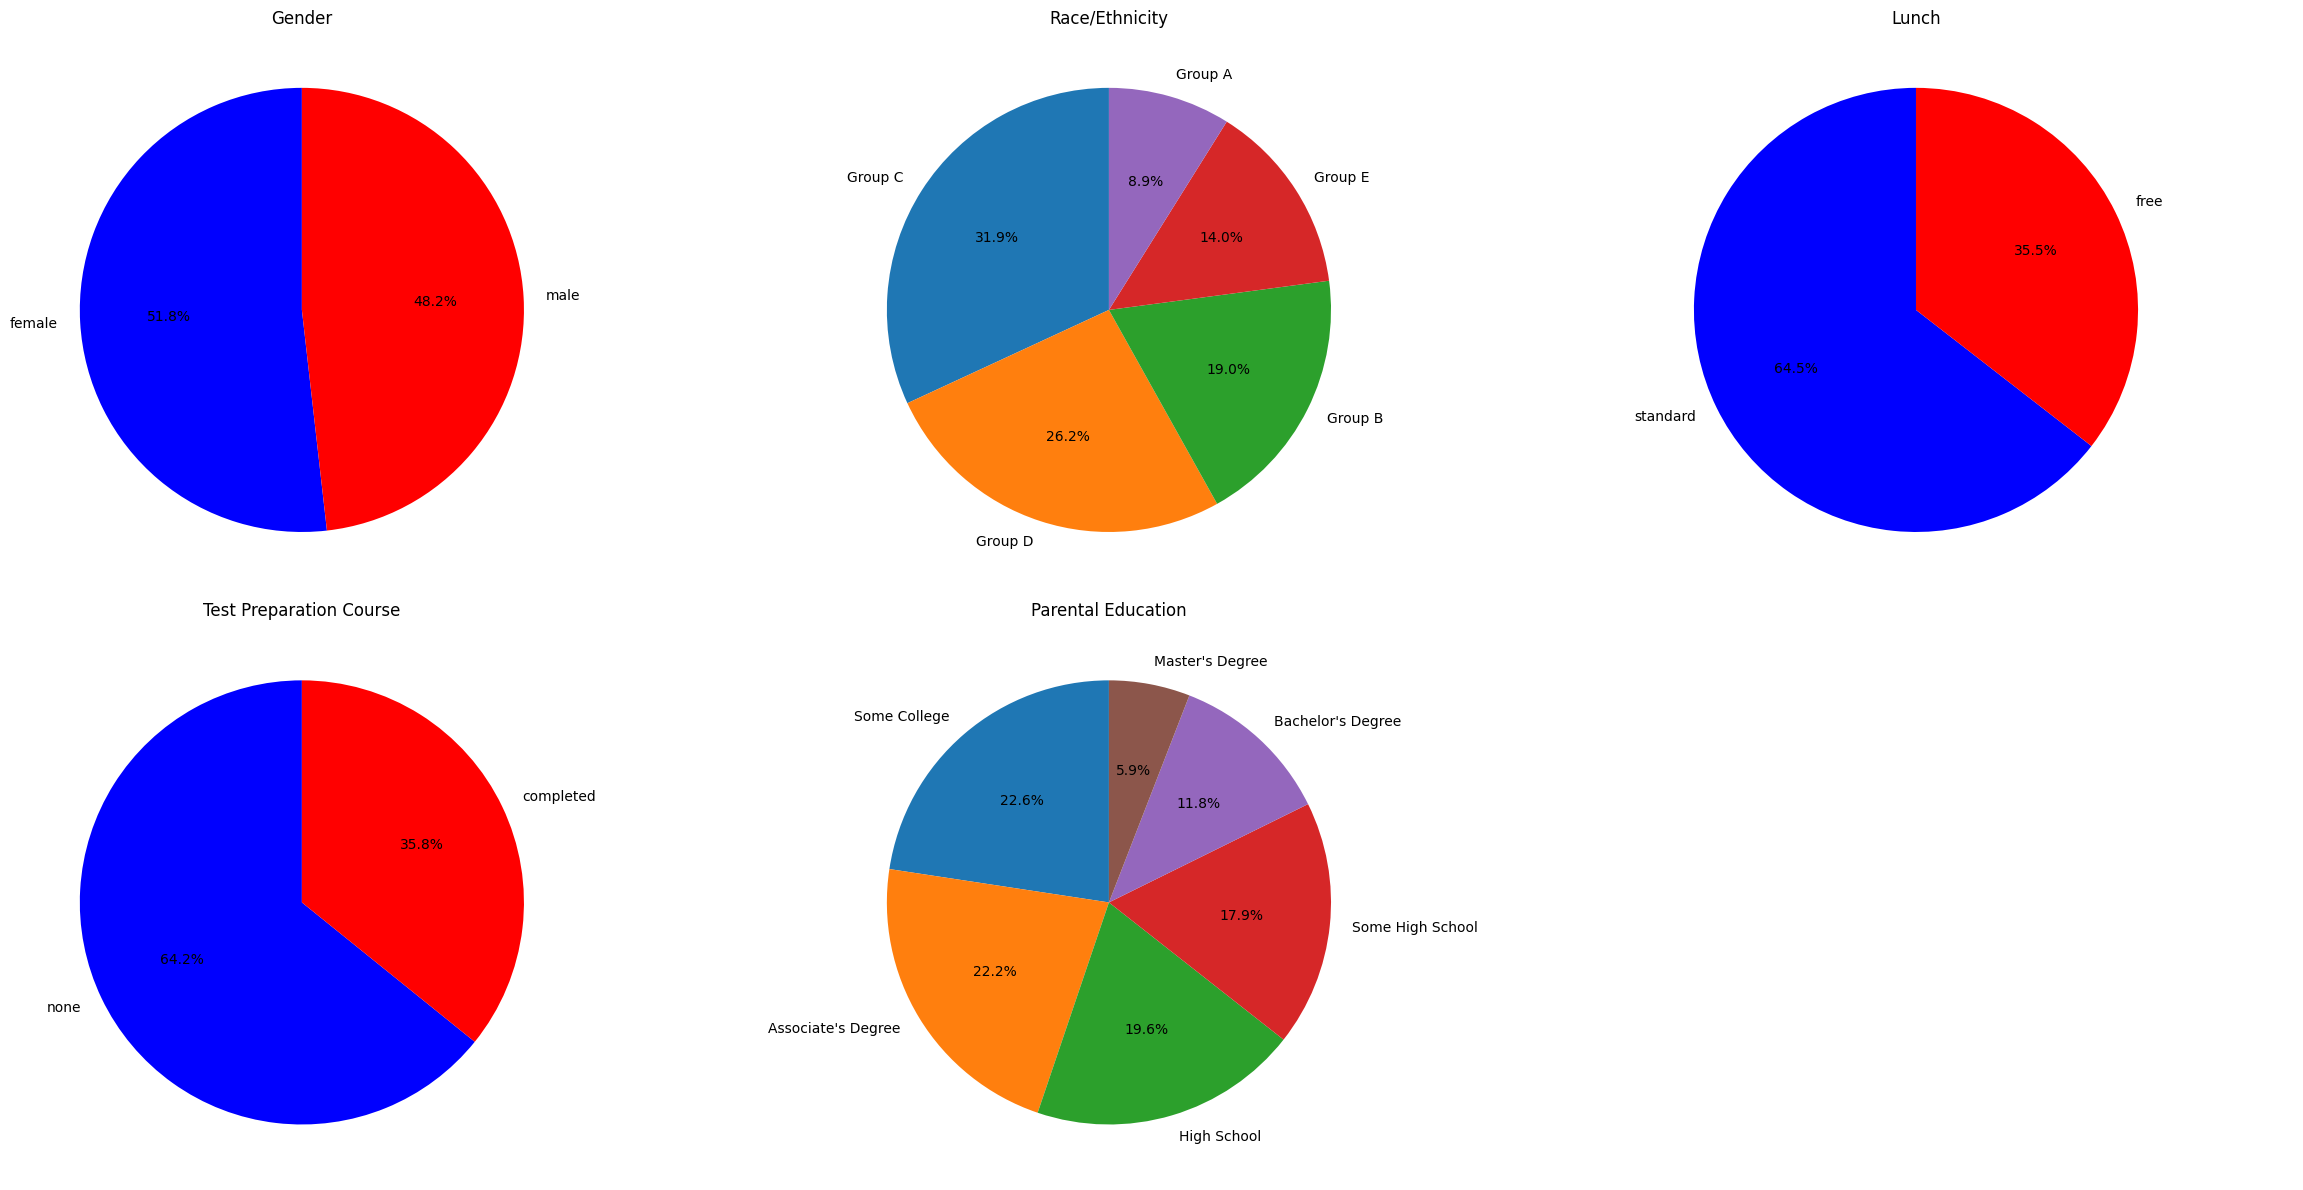

In [ ]:
plt.rcParams['figure.figsize'] = [24, 12]

fig, axs = plt.subplots(2, 3)

# Gender Pie
size = df['gender'].value_counts()
labels = ['female', 'male']
color = ['blue', 'red']
axs[0, 0].pie(size, labels=labels, autopct='%1.1f%%', colors=color, startangle=90)
axs[0, 0].set_title('Gender')
axs[0, 0].axis('off')

# Lunch Pie
size = df['lunch'].value_counts()
labels = ['standard', 'free']
color = ['blue', 'red']
axs[0, 2].pie(size, labels=labels, colors=color, autopct='%1.1f%%', startangle=90)
axs[0, 2].set_title('Lunch')
axs[0, 2].axis('off')

# Race/Ethnicity Pie
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
axs[0, 1].pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Race/Ethnicity')
axs[0, 1].axis('off')

# Test Preparation Course Pie
size = df['test_preparation_course'].value_counts()
labels = ['none', 'completed']
color = ['blue', 'red']
axs[1, 0].pie(size, labels=labels, colors=color, autopct='%1.1f%%', startangle=90)
axs[1, 0].set_title('Test Preparation Course')
axs[1, 0].axis('off')

# Parental Education Pie
size = df['parental_level_of_education'].value_counts()
labels = ('Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree")
axs[1, 1].pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1, 1].set_title('Parental Education')
axs[1, 1].axis('off')

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [92]:
gender_group = df.groupby('gender')[numeric_columns].mean()
gender_group

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [106]:
female_scores_avg = gender_group.loc['female'].mean()
male_scores_avg= gender_group.loc['male'].mean()
print(female_scores_avg)
print(male_scores_avg)

69.56949806949807
65.8374827109267


In [107]:
gender_group['average'] = gender_group.mean(axis=1).round(2)
gender_group

,math_score,reading_score,writing_score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.57
male,68.728216,65.473029,63.311203,65.84


In [ ]:
scores = [female_scores_avg, male_scores_avg, gender_group.loc['female', 'math_score'], gender_group.loc['male', 'math_score']]
categories = ['Female Avg', 'Male Avg', 'Female Math', 'Male Math']

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=scores, palette=['blue', 'red', 'blue', 'red'])
plt.ylabel('Score')
plt.title('Comparison of Average and Math Scores by Gender')
plt.ylim(0, 100)
plt.show()

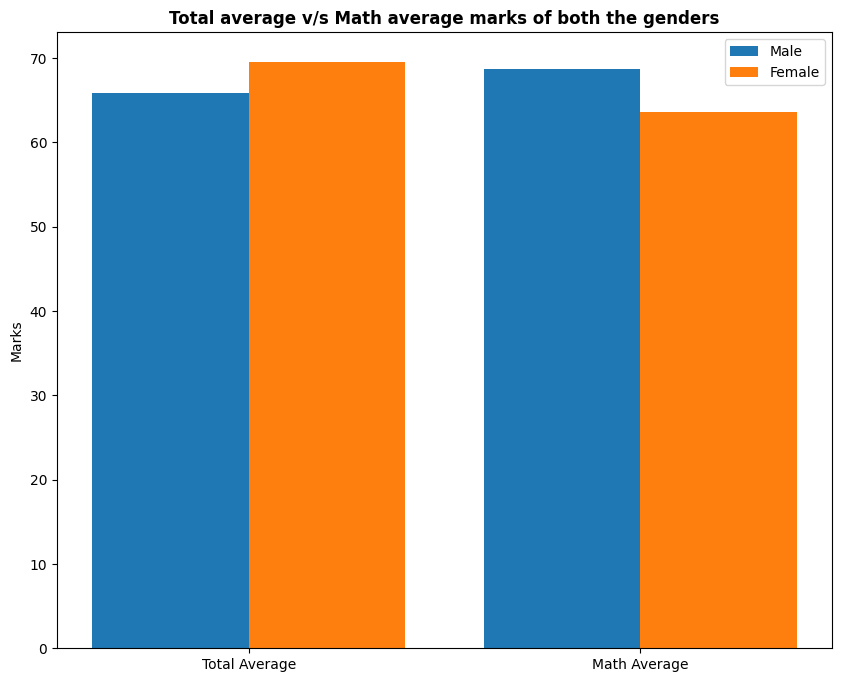

In [119]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


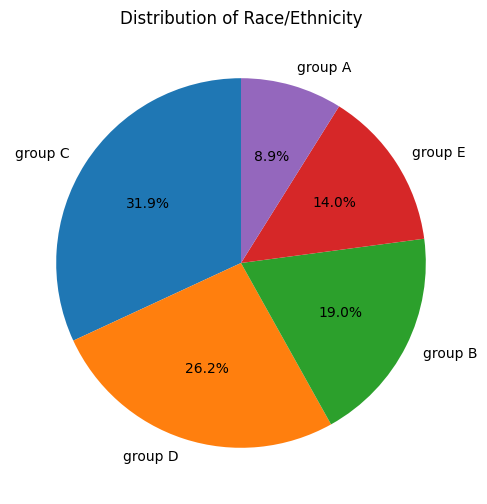

In [120]:
size = df['race_ethnicity'].value_counts()
labels = size.index
plt.figure(figsize=(8, 6))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Race/Ethnicity')
plt.axis('off')
plt.show()

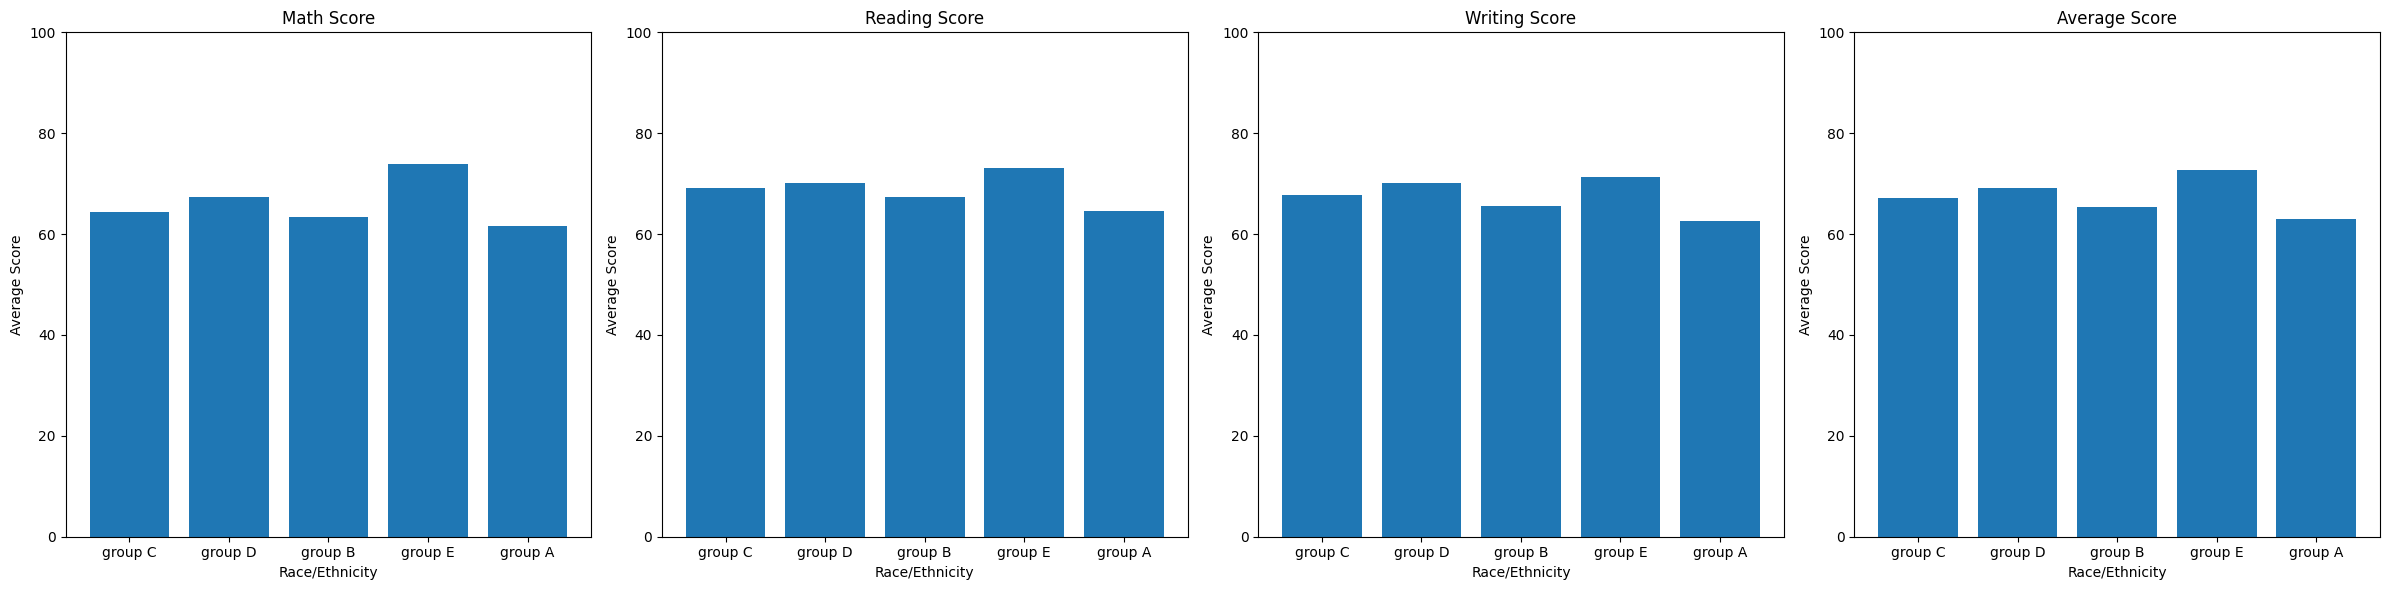

In [126]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

score_types = ['math_score', 'reading_score', 'writing_score', 'average_score']
titles = ['Math Score', 'Reading Score', 'Writing Score', 'Average Score']

for i, (score, title) in enumerate(zip(score_types, titles)):
    race_group = df.groupby('race_ethnicity')[score].mean().reindex(labels)
    axes[i].bar(race_group.index, race_group.values)
    axes[i].set_title(title)
    axes[i].set_xlabel('Race/Ethnicity')
    axes[i].set_ylabel('Average Score')
    axes[i].set_ylim(0, 100)
plt.tight_layout()
plt.show()

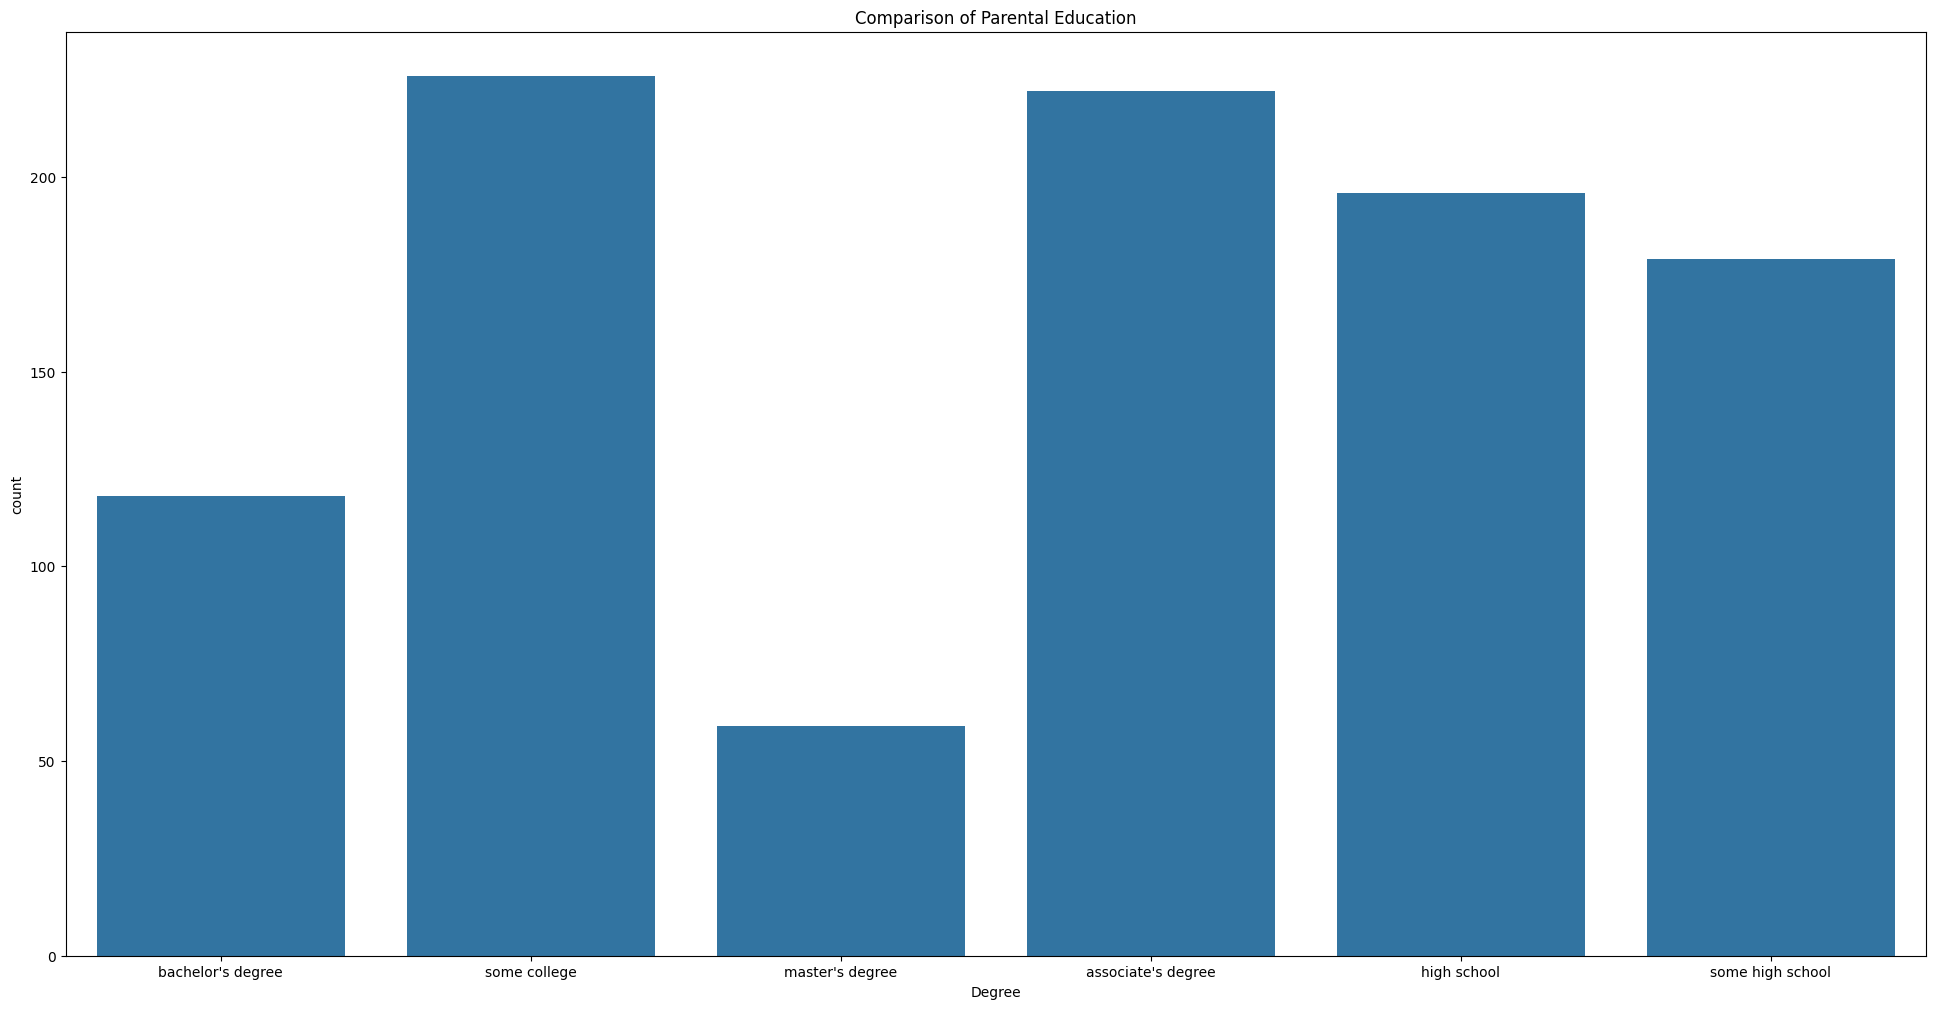

In [128]:
sns.countplot(data=df, x='parental_level_of_education')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

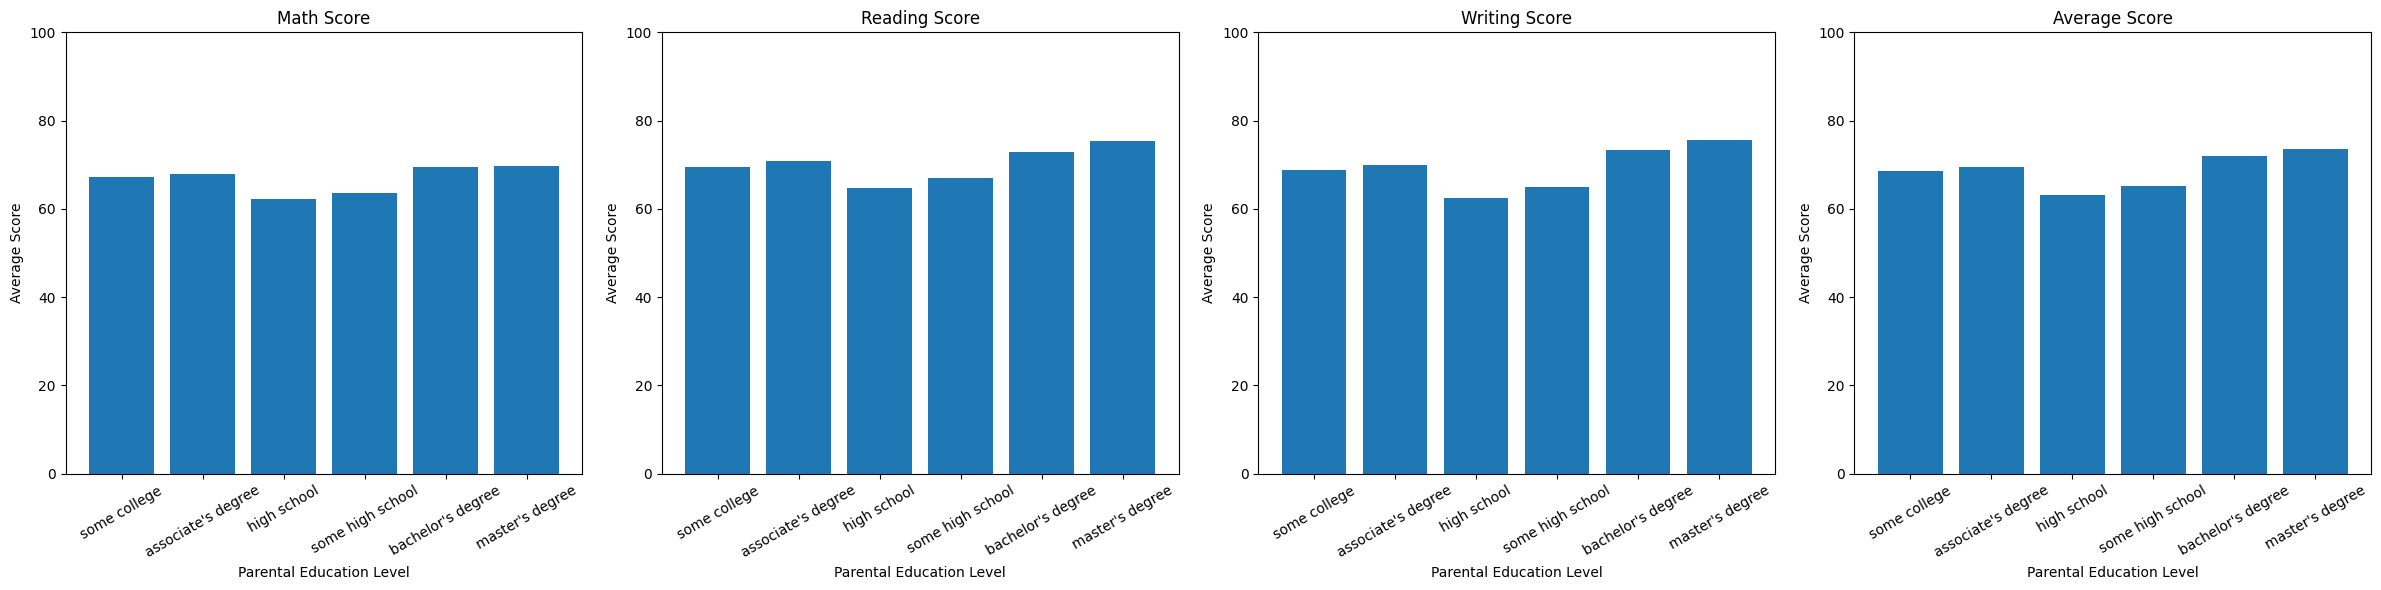

In [132]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

score_types = ['math_score', 'reading_score', 'writing_score', 'average_score']
titles = ['Math Score', 'Reading Score', 'Writing Score', 'Average Score']

parental_levels=df['parental_level_of_education'].value_counts().index.tolist()

parental_labels = ['some college', "associate's degree", 'high school','some high school', "bachelor's degree", "master's degree"
]

for i, (score, title) in enumerate(zip(score_types, titles)):
    parental_education_group = df.groupby('parental_level_of_education')[score].mean().reindex(parental_labels)
    axes[i].bar(parental_education_group.index, parental_education_group.values)
    axes[i].set_title(title)
    axes[i].set_xlabel('Parental Education Level')
    axes[i].set_ylabel('Average Score')
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

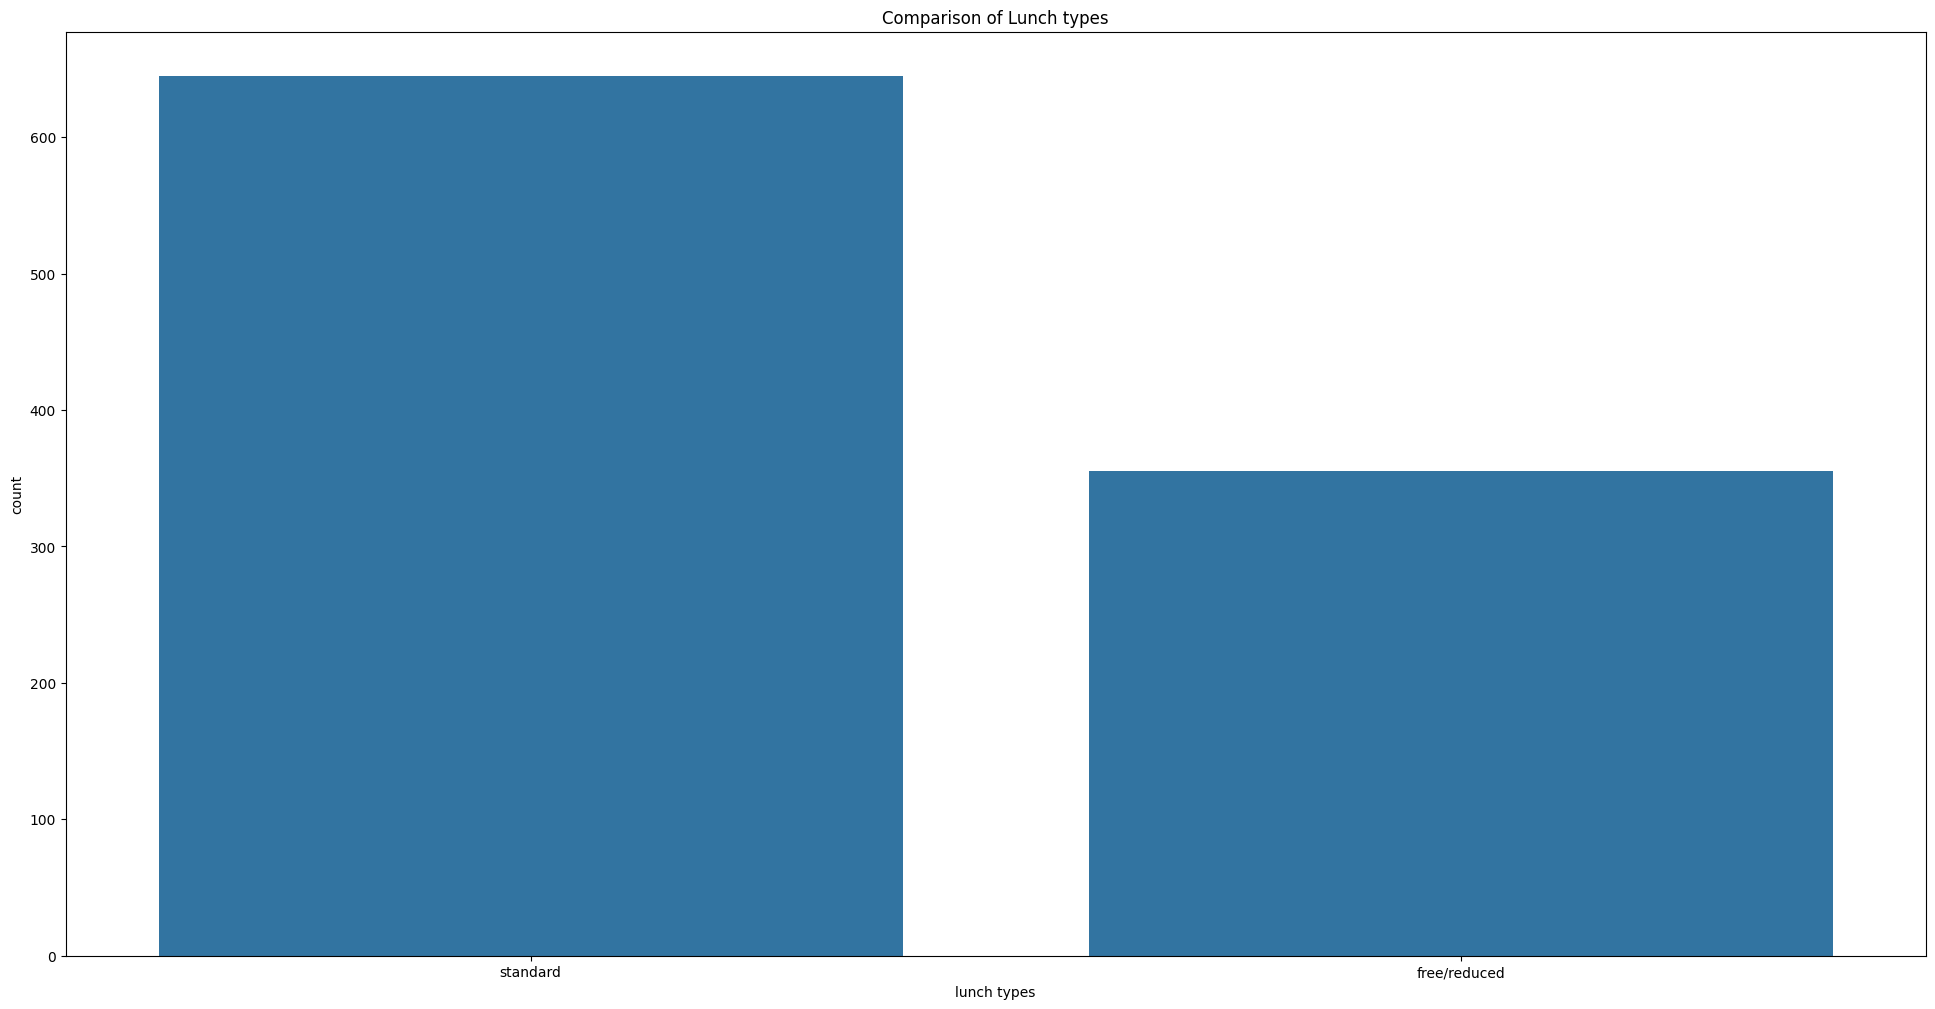

In [136]:
sns.countplot(data=df, x='lunch')
plt.title('Comparison of Lunch types')
plt.xlabel('lunch types')
plt.ylabel('count')
plt.show()

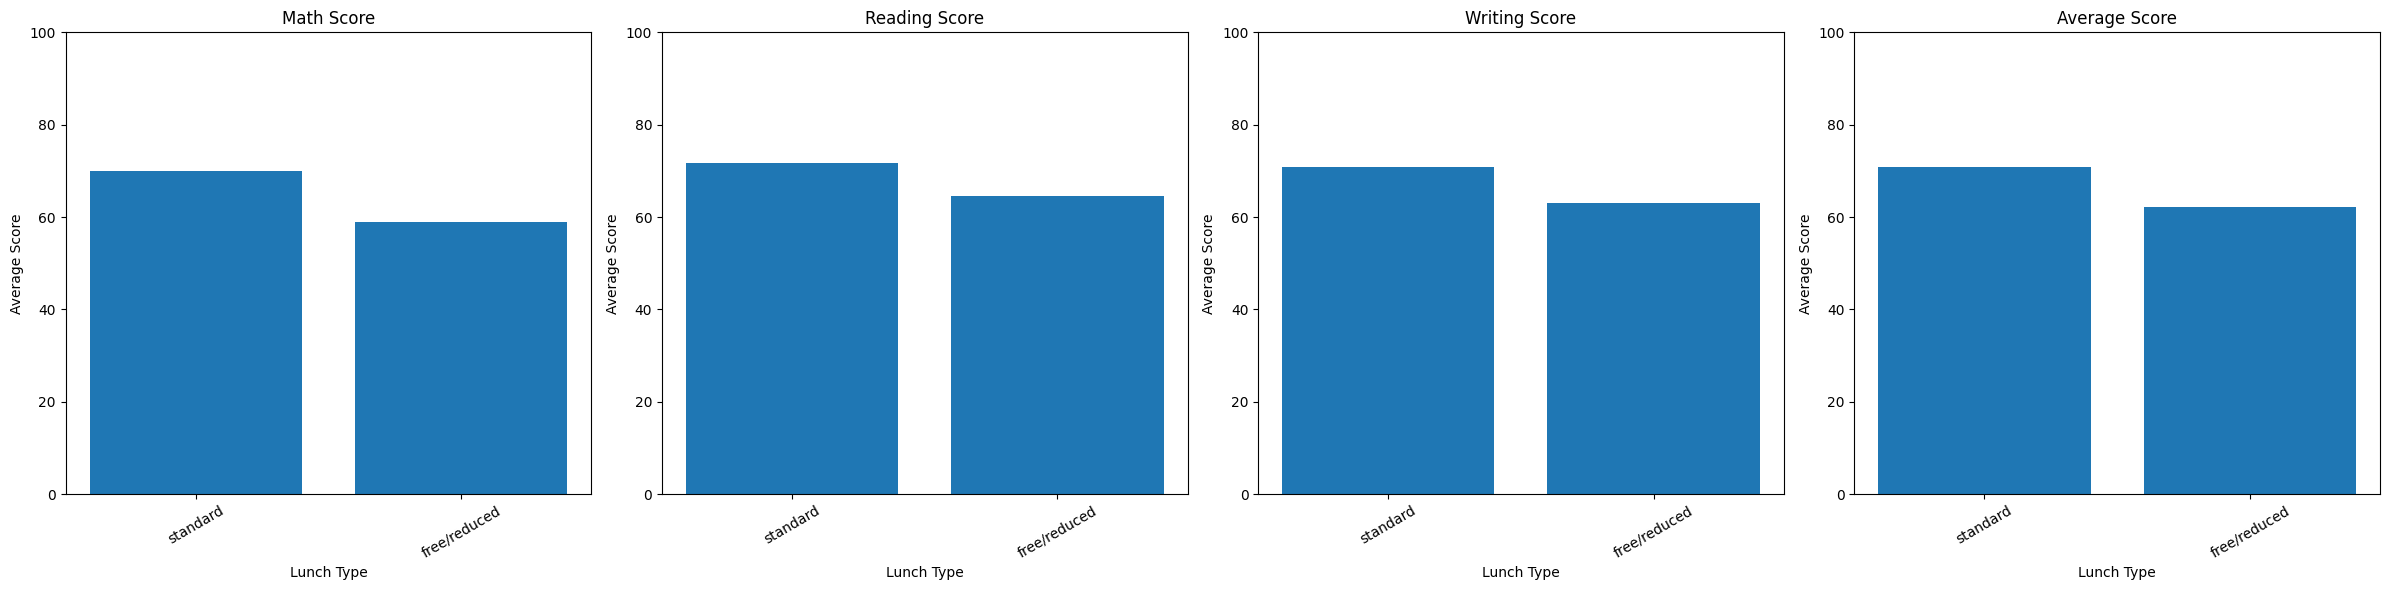

In [150]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

score_types = ['math_score', 'reading_score', 'writing_score', 'average_score']
titles = ['Math Score', 'Reading Score', 'Writing Score', 'Average Score']

lunch_levels=df['lunch'].value_counts().index.tolist()

lunch_labels = ['standard', "free/reduced"]

for i, (score, title) in enumerate(zip(score_types, titles)):
    lunch_group = df.groupby('lunch')[score].mean().reindex(lunch_labels)
    axes[i].bar(lunch_group.index, lunch_group.values)
    axes[i].set_title(title)
    axes[i].set_xlabel('Lunch Type')
    axes[i].set_ylabel('Average Score')
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

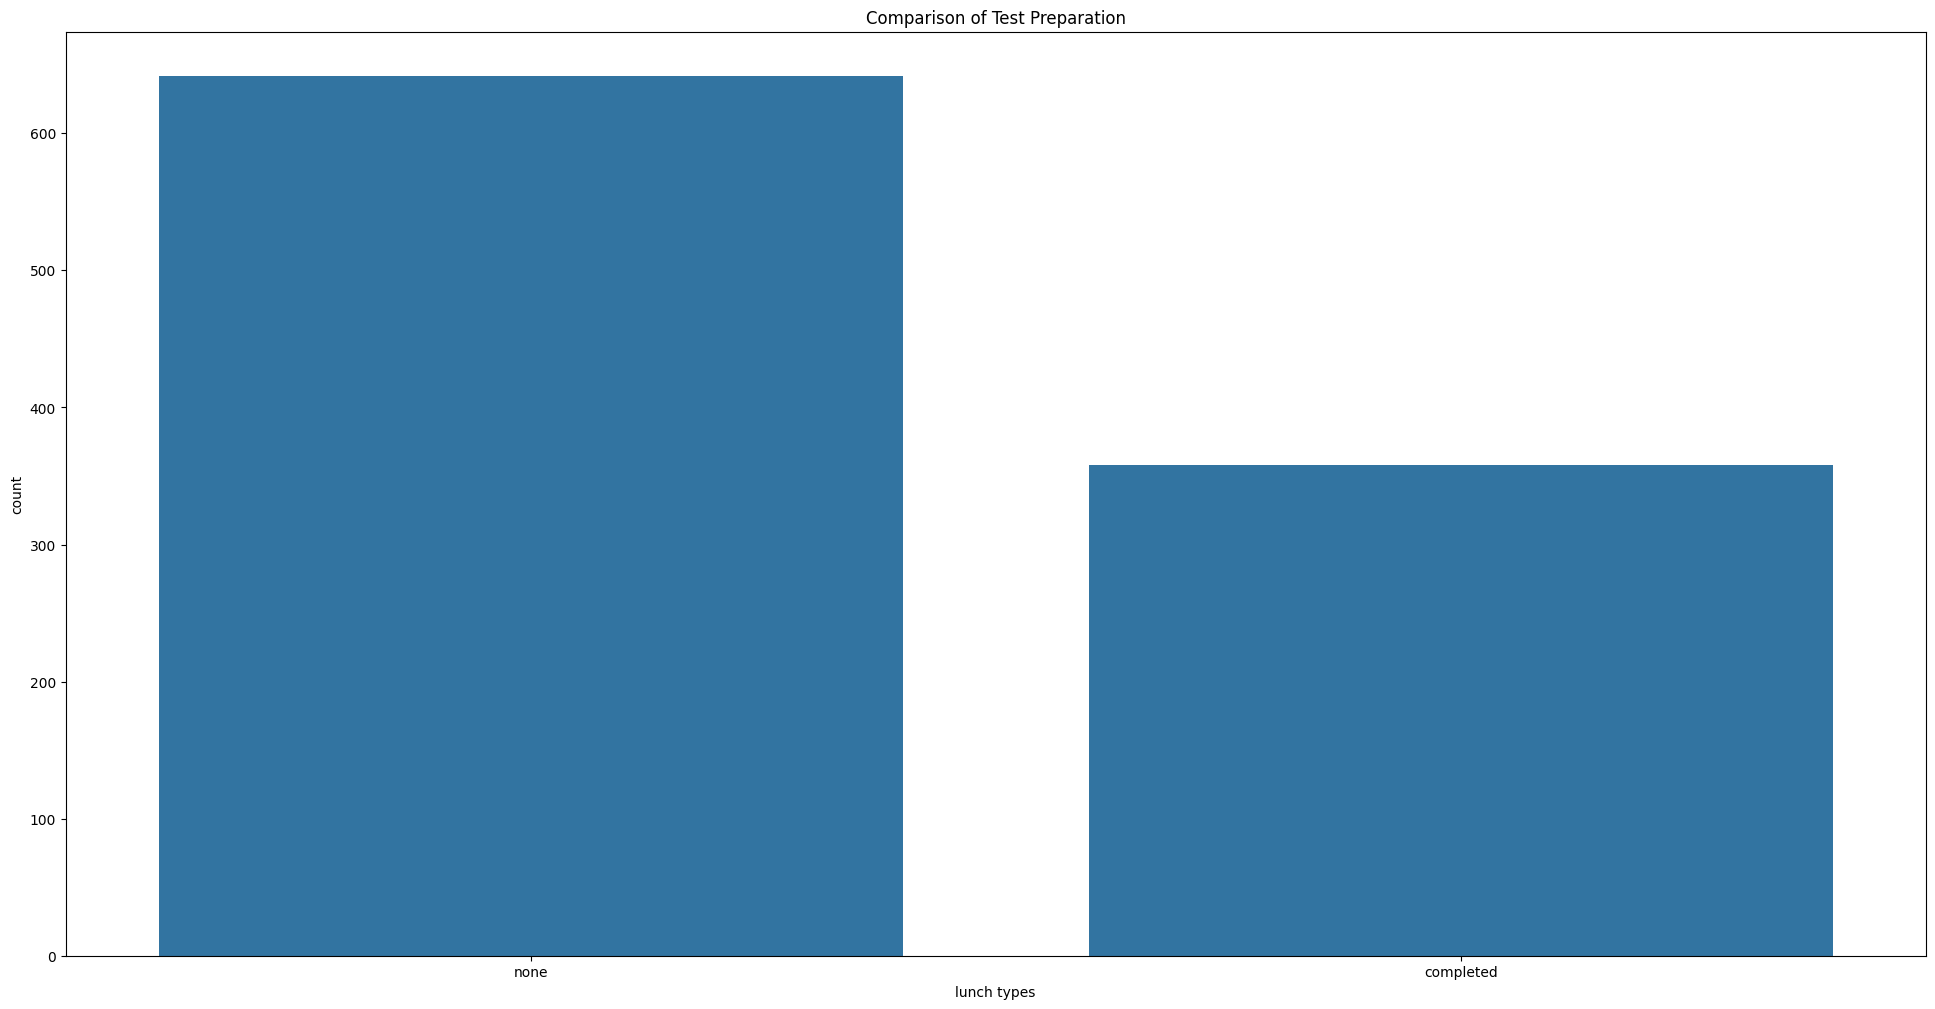

In [152]:
sns.countplot(data=df, x='test_preparation_course')
plt.title('Comparison of Test Preparation')
plt.xlabel('lunch types')
plt.ylabel('count')
plt.show()

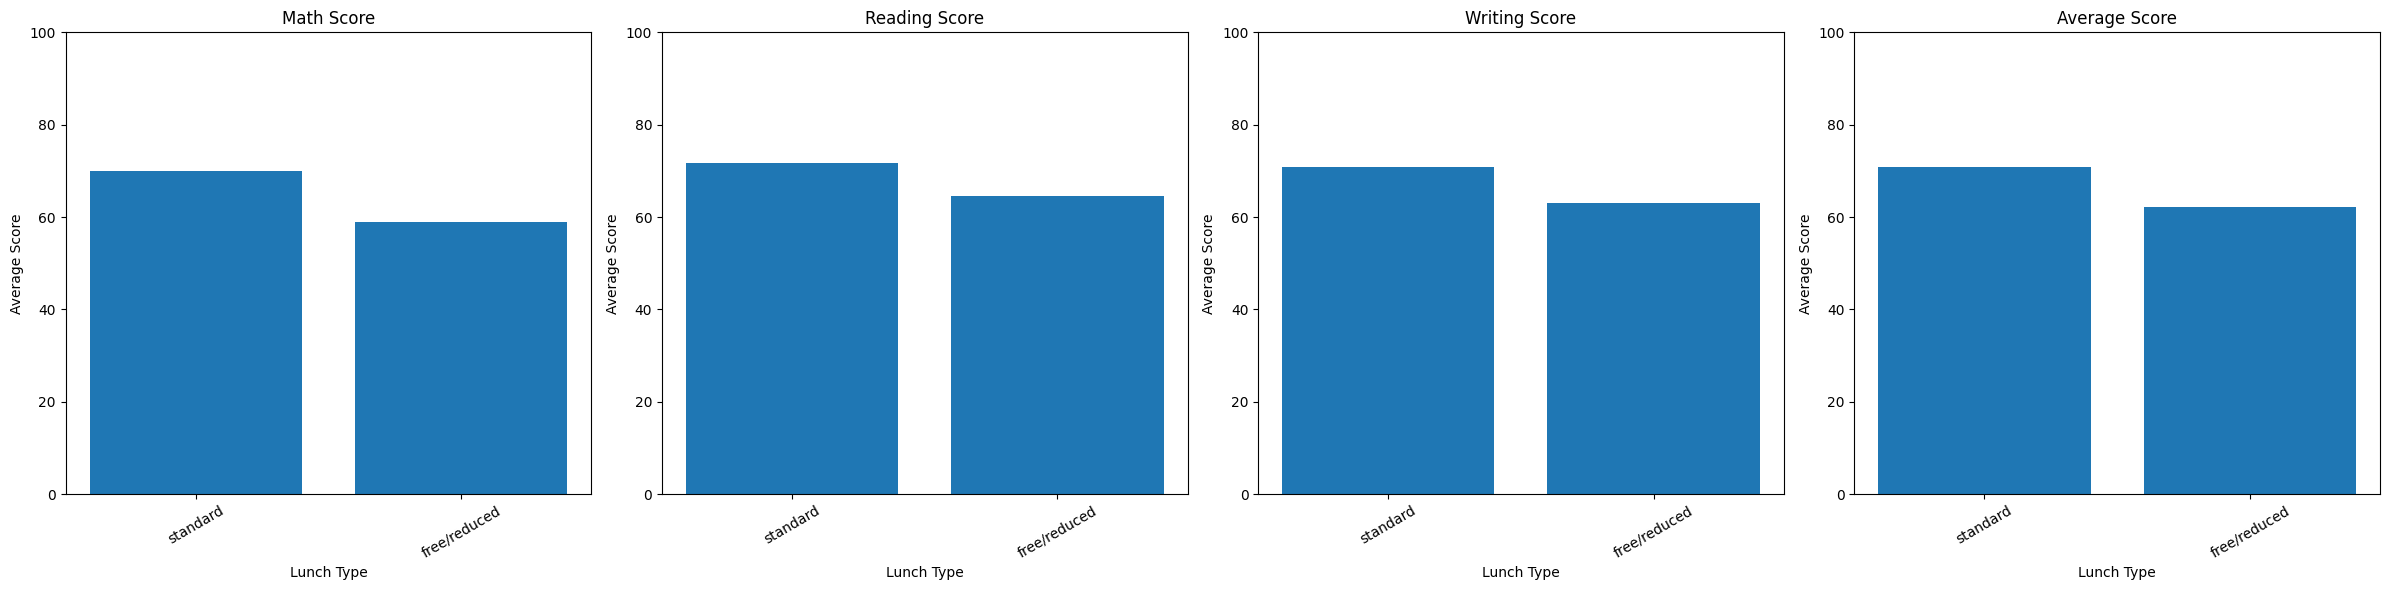

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

score_types = ['math_score', 'reading_score', 'writing_score', 'average_score']
titles = ['Math Score', 'Reading Score', 'Writing Score', 'Average Score']

test_prep_levels=df['test_preparation_course'].value_counts().index.tolist()

test_prep_labels = ['none', "completed"]

for i, (score, title) in enumerate(zip(score_types, titles)):
    test_prep_group = df.groupby('lunch')[score].mean().reindex(test_prep_labels)
    axes[i].bar(test_prep_group.index, test_prep_group.values)
    axes[i].set_title(title)
    axes[i].set_xlabel('Test Preparation Type')
    axes[i].set_ylabel('Average Score')
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

In [162]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


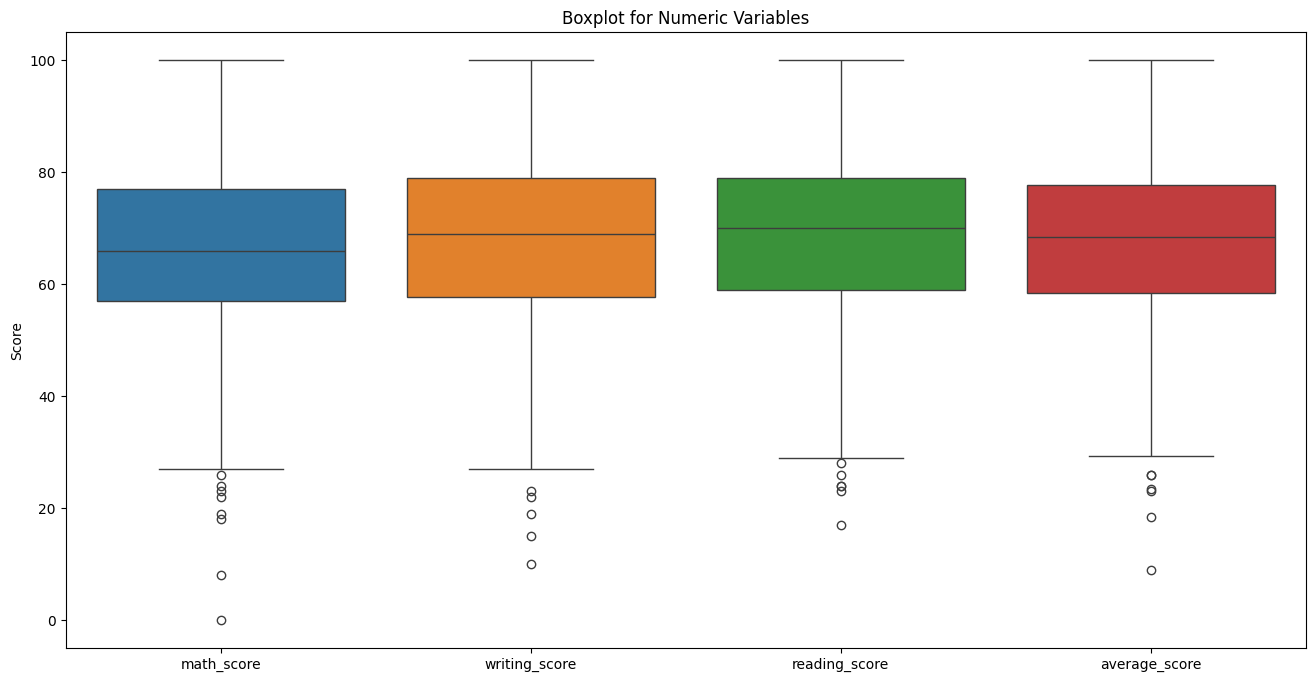

In [165]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[['math_score','writing_score','reading_score','average_score']])
plt.title('Boxplot for Numeric Variables')
plt.ylabel('Score')
plt.show()

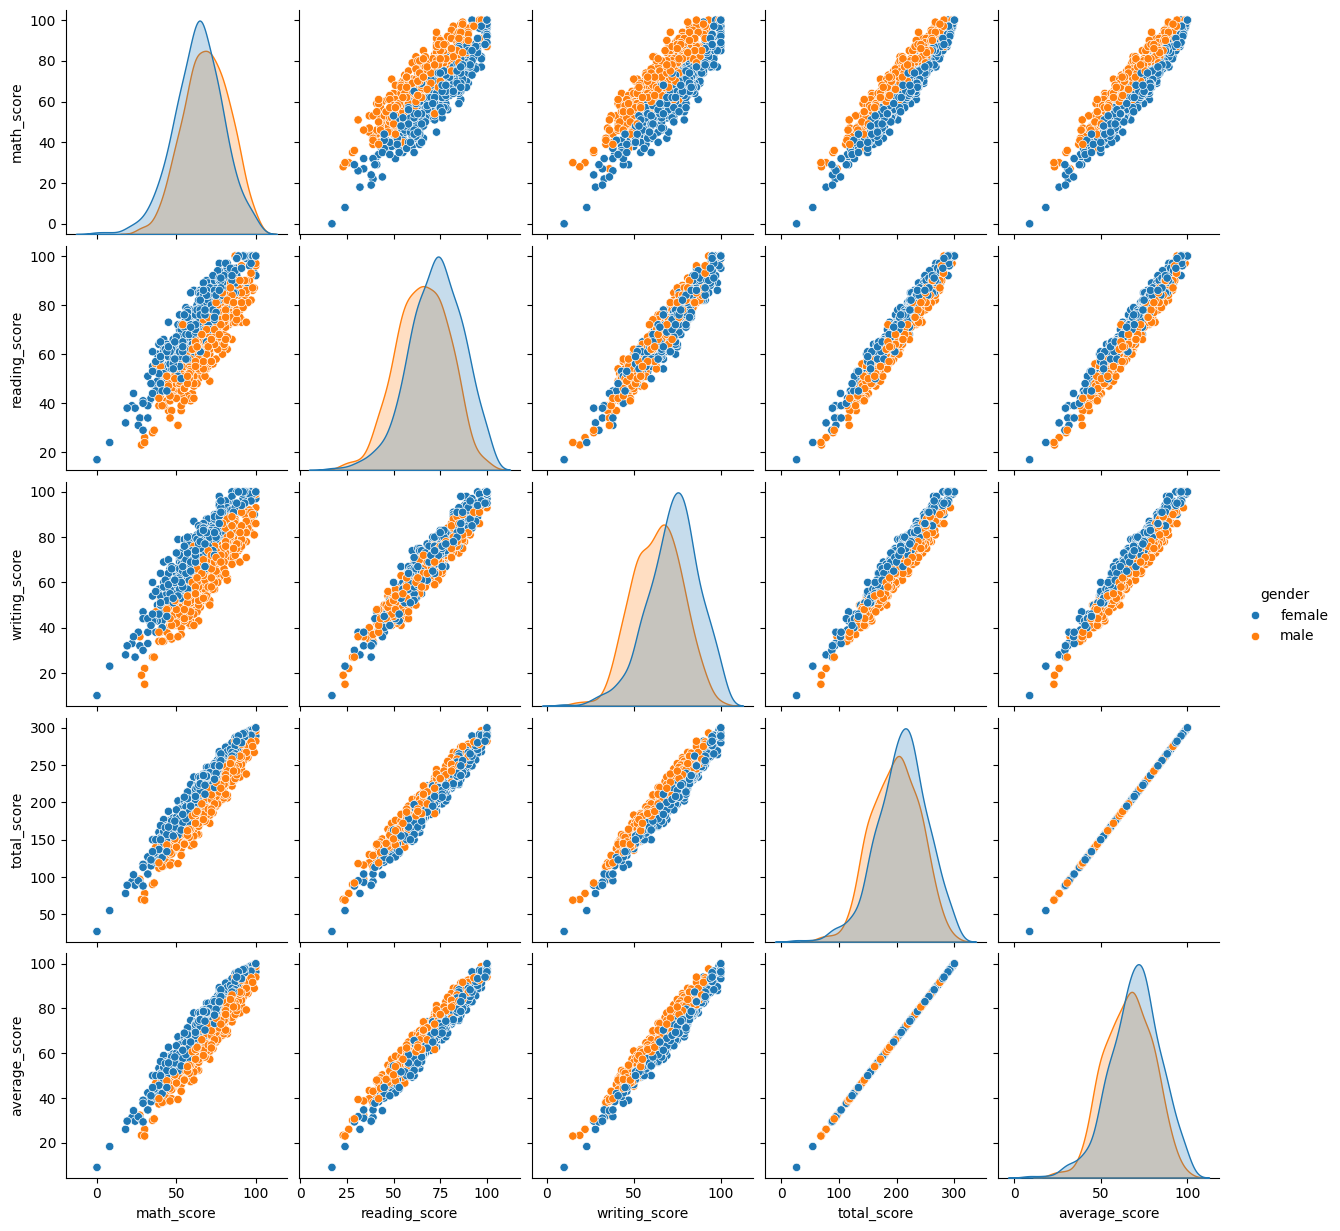

In [164]:
sns.pairplot(df,hue = 'gender')
plt.show()
